### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
humidity_df = pd.read_csv('weather/humidity.csv')
pressure_df = pd.read_csv('weather/pressure.csv')
temperature_df = pd.read_csv('weather/temperature.csv')
weather_description_df = pd.read_csv('weather/weather_description.csv')
wind_direction_df = pd.read_csv('weather/wind_direction.csv')
wind_speed_df = pd.read_csv('weather/wind_speed.csv')

### Checking the data sets

In [3]:
print('Humidity data shape: ', humidity_df.shape)
print('Pressure data shape: ', pressure_df.shape)
print('Temperature data shape: ', temperature_df.shape)
print('weather description data shape: ', weather_description_df.shape)
print('wind_direction data shape: ', wind_direction_df.shape)
print('wind speed data shape: ', wind_speed_df.shape)

Humidity data shape:  (45253, 37)
Pressure data shape:  (45253, 37)
Temperature data shape:  (45253, 37)
weather description data shape:  (45253, 37)
wind_direction data shape:  (45253, 37)
wind speed data shape:  (45253, 37)


#### DELETE THE NON LAS VEGAS DATA

In [4]:
humidity = humidity_df[['datetime', 'Las Vegas']]
humidity.head()

,datetime,Las Vegas
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,22.0
2,2012-10-01 14:00:00,21.0
3,2012-10-01 15:00:00,21.0
4,2012-10-01 16:00:00,21.0


In [5]:
pressure = pressure_df[['datetime', 'Las Vegas']]
pressure.head()

,datetime,Las Vegas
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,1018.0
2,2012-10-01 14:00:00,1018.0
3,2012-10-01 15:00:00,1018.0
4,2012-10-01 16:00:00,1018.0


In [6]:
temperature = temperature_df[['datetime', 'Las Vegas']]
temperature.head()

,datetime,Las Vegas
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,293.410000
2,2012-10-01 14:00:00,293.403141
3,2012-10-01 15:00:00,293.392177
4,2012-10-01 16:00:00,293.381213


In [7]:
weather_description = weather_description_df[['datetime', 'Las Vegas']]
weather_description.head()

,datetime,Las Vegas
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,sky is clear
2,2012-10-01 14:00:00,sky is clear
3,2012-10-01 15:00:00,sky is clear
4,2012-10-01 16:00:00,sky is clear


In [8]:
wind_direction = wind_direction_df[['datetime', 'Las Vegas']]
wind_direction.head()

,datetime,Las Vegas
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,0.0
2,2012-10-01 14:00:00,8.0
3,2012-10-01 15:00:00,23.0
4,2012-10-01 16:00:00,37.0


In [9]:
wind_speed = wind_speed_df[['datetime', 'Las Vegas']]
wind_speed.head()

,datetime,Las Vegas
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,0.0
2,2012-10-01 14:00:00,0.0
3,2012-10-01 15:00:00,0.0
4,2012-10-01 16:00:00,0.0


In [10]:
weather_df = (weather_description.merge(humidity, on = 'datetime')
             .merge(pressure, on = 'datetime')
             .merge(temperature, on = 'datetime')
             .merge(wind_direction, on = 'datetime')
             .merge(wind_speed, on = 'datetime')
             )
weather_df.columns = ['Datetime', 'Description', 'Humidity', 'Pressure', 'Temperature', 'Wind_Direction', 'Wind_Speed']
weather_df['Temperature_C'] = weather_df['Temperature']-273.15
weather_df.head()


,Datetime,Description,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,Temperature_C
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,sky is clear,22.0,1018.0,293.410000,0.0,0.0,293.410000
2,2012-10-01 14:00:00,sky is clear,21.0,1018.0,293.403141,8.0,0.0,293.403141
3,2012-10-01 15:00:00,sky is clear,21.0,1018.0,293.392177,23.0,0.0,293.392177
4,2012-10-01 16:00:00,sky is clear,21.0,1018.0,293.381213,37.0,0.0,293.381213


In [11]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45253 entries, 0 to 45252
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        45253 non-null  object 
 1   Description     45252 non-null  object 
 2   Humidity        44411 non-null  float64
 3   Pressure        45165 non-null  float64
 4   Temperature     45252 non-null  float64
 5   Wind_Direction  45248 non-null  float64
 6   Wind_Speed      45238 non-null  float64
 7   Temperature_C   45252 non-null  float64
dtypes: float64(6), object(2)
memory usage: 3.1+ MB


In [12]:
missing_data = weather_df.isnull().sum().sort_values(ascending=False)
percentage_missing_data = weather_df.isnull().sum()/weather_df.isnull().count().sort_values(ascending = False) * 100
missing_values = pd.concat([missing_data, percentage_missing_data], axis=1, keys=['missing_data', 'percentage'])
missing_values


,missing_data,percentage
Humidity,842,1.860650
Pressure,88,0.194462
Wind_Speed,15,0.033147
Wind_Direction,5,0.011049
Temperature_C,1,0.002210
Temperature,1,0.002210
Description,1,0.002210
Datetime,0,0.000000


In [13]:
weather_df.describe()

,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,Temperature_C
count,44411.000000,45165.000000,45252.000000,45248.000000,45238.000000,45252.000000
mean,31.937831,1013.659648,292.424887,176.320987,2.463482,292.424887
std,20.041855,18.893592,10.829522,106.902903,2.318692,10.829522
min,5.000000,901.000000,260.561333,0.000000,0.000000,260.561333
25%,16.000000,1010.000000,283.920000,94.000000,1.000000,283.920000
50%,27.000000,1015.000000,292.027486,180.000000,2.000000,292.027486
75%,43.000000,1022.000000,300.835000,255.000000,3.000000,300.835000
max,100.000000,1047.000000,318.640000,360.000000,19.000000,318.640000


In [14]:
weather_df.corr()

,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,Temperature_C
Humidity,1.000000,0.090426,-0.593925,0.119060,-0.212600,-0.593925
Pressure,0.090426,1.000000,-0.227875,-0.016571,-0.071537,-0.227875
Temperature,-0.593925,-0.227875,1.000000,-0.173688,0.190326,1.000000
Wind_Direction,0.119060,-0.016571,-0.173688,1.000000,0.138710,-0.173688
Wind_Speed,-0.212600,-0.071537,0.190326,0.138710,1.000000,0.190326
Temperature_C,-0.593925,-0.227875,1.000000,-0.173688,0.190326,1.000000


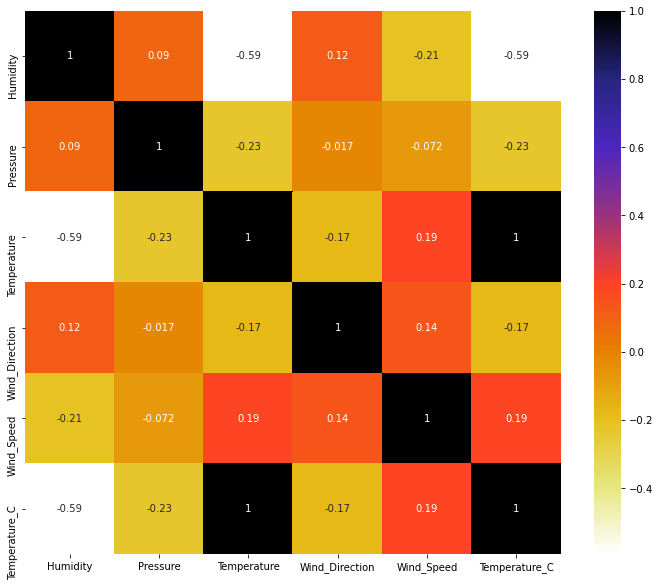

In [15]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = weather_df.corr()
sns.heatmap(cor, annot= True, cmap=plt.cm.CMRmap_r)
plt.show()

In [16]:
#Convert dtaes to datetime format
weather_df['Datetime'] = pd.to_datetime(weather_df['Datetime']);
weather_df['Datetime'].head()

0   2012-10-01 12:00:00
1   2012-10-01 13:00:00
2   2012-10-01 14:00:00
3   2012-10-01 15:00:00
4   2012-10-01 16:00:00
Name: Datetime, dtype: datetime64[ns]

In [17]:
weather_df.head()

,Datetime,Description,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,Temperature_C
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,sky is clear,22.0,1018.0,293.410000,0.0,0.0,293.410000
2,2012-10-01 14:00:00,sky is clear,21.0,1018.0,293.403141,8.0,0.0,293.403141
3,2012-10-01 15:00:00,sky is clear,21.0,1018.0,293.392177,23.0,0.0,293.392177
4,2012-10-01 16:00:00,sky is clear,21.0,1018.0,293.381213,37.0,0.0,293.381213


In [18]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45253 entries, 0 to 45252
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Datetime        45253 non-null  datetime64[ns]
 1   Description     45252 non-null  object        
 2   Humidity        44411 non-null  float64       
 3   Pressure        45165 non-null  float64       
 4   Temperature     45252 non-null  float64       
 5   Wind_Direction  45248 non-null  float64       
 6   Wind_Speed      45238 non-null  float64       
 7   Temperature_C   45252 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 3.1+ MB


In [19]:
#Filling the numerical Null values with mean
weather_df['Humidity'] = weather_df['Humidity'].fillna(weather_df['Humidity'].median())
weather_df['Pressure'] = weather_df['Pressure'].fillna(weather_df['Pressure'].median())
weather_df['Temperature'] = weather_df['Temperature'].fillna(weather_df['Temperature'].median())
weather_df['Wind_Direction'] = weather_df['Wind_Direction'].fillna(weather_df['Wind_Direction'].median())
weather_df['Wind_Speed'] = weather_df['Wind_Speed'].fillna(weather_df['Wind_Speed'].median())
weather_df['Temperature_C'] = weather_df['Temperature_C'].fillna(weather_df['Temperature_C'].median())

In [20]:
#Filling the categorical values with mode
weather_df['Description'] = weather_df['Description'].fillna(weather_df['Description'].mode()[0])

In [21]:
weather_df.isnull().sum()

Datetime          0
Description       0
Humidity          0
Pressure          0
Temperature       0
Wind_Direction    0
Wind_Speed        0
Temperature_C     0
dtype: int64

### DATA VISUALIZATION

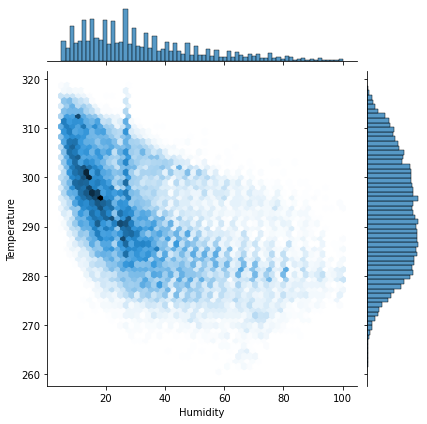

In [22]:
#Draws a probability density function(PDF)
sns.jointplot(x='Humidity', y='Temperature', data=weather_df, kind='hex')

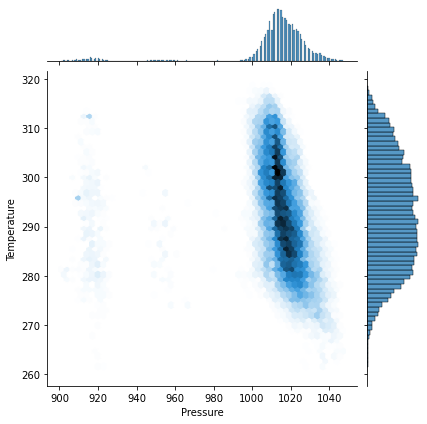

In [23]:
sns.jointplot(x='Pressure', y='Temperature', data=weather_df, kind='hex')


In [25]:
#sns.pairplot(weather_df, hue = 'Description')

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

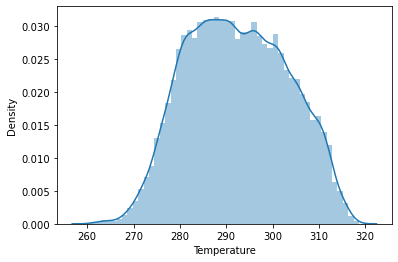

In [24]:
sns.distplot(weather_df['Temperature'])

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity', ylabel='Density'>

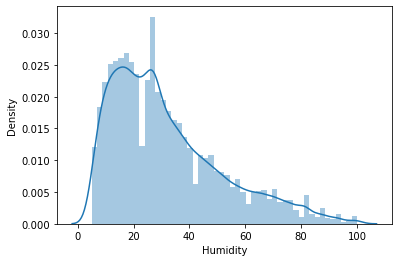

In [25]:
sns.distplot(weather_df['Humidity'])

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pressure', ylabel='Density'>

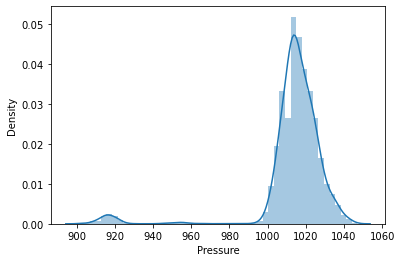

In [26]:
sns.distplot(weather_df['Pressure'])

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind_Direction', ylabel='Density'>

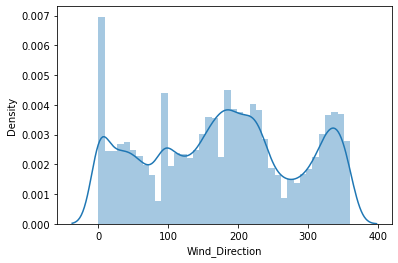

In [27]:
sns.distplot(weather_df['Wind_Direction'])

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind_Speed', ylabel='Density'>

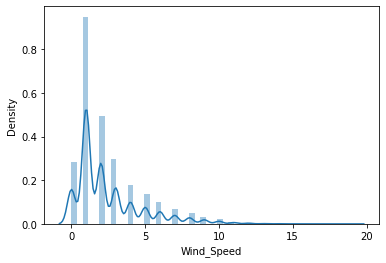

In [28]:
sns.distplot(weather_df['Wind_Speed'])

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Description', ylabel='count'>

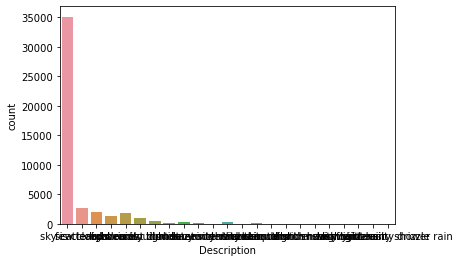

In [29]:
sns.countplot('Description', data = weather_df)

In [30]:
weather_df['Description'].value_counts()

sky is clear                    35091
few clouds                       2607
scattered clouds                 2051
broken clouds                    1820
light rain                       1321
overcast clouds                   933
proximity thunderstorm            431
haze                              292
moderate rain                     270
light intensity drizzle           168
mist                               78
thunderstorm                       66
heavy intensity rain               50
dust                               21
squalls                            15
thunderstorm with light rain       10
drizzle                             9
light snow                          9
thunderstorm with heavy rain        6
fog                                 2
heavy intensity drizzle             1
thunderstorm with rain              1
light intensity shower rain         1
Name: Description, dtype: int64